# TODO

- from train.py understand the yolo loss
- from models understand the yolo architecture
- import actual functions instead of *
- Put the forked python files in one file
- Eval Function

In [ ]:
txt_gen()

NameError: ignored

# YOLO v4 Architecture



## Imports

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch import optim
import os
from easydict import EasyDict as edict
from torch.nn import functional as F
import numpy as np
from torch.utils.data.dataset import Dataset

import random
import cv2
import sys
import numpy as np
import os
import matplotlib.pyplot as plt

import sys
import os
import time
import math
import numpy as np
import PIL
from PIL import Image, ImageDraw, ImageFont
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import itertools
import struct 
import imghdr
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Import Comments
 - `models.py` contain the class for the architecture that was used YOLO v4
 - `train.py` contains the class for the YOLO Loss
 - `dataset.py` contains the class for the dataset as well as the functions used for the data augmentation
 - `config.py` contains the configurations for the data augmentation (e.g. hue values, saturation values, image height, image width, etc.)

In [3]:
""" Source Code (modified): https://github.com/Tianxiaomo/pytorch-YOLOv4 """

import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/YOLO trainer')

from models import *
from train import *
from dataset import *
from config import *

## Downloads
- Download the specific version of libraries that YOLO requires
- Download pretrained yolo weights from Google Drive
- Download the model summary library 

In [5]:
# Download the specific version of libraries that YOLO requires
!pip install -r "/content/drive/My Drive/Colab Notebooks/YOLO trainer/requirements.txt"

ERROR: Operation cancelled by user


-------
download pretrained yolo weights


In [6]:
# download pretrained yolo weights
# !gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA

In [7]:
pip install summary

  Created wheel for summary: filename=summary-0.2.0-cp36-none-any.whl size=18144 sha256=5863ca8659862fd8eeaecbf0c1bc67c007967dd5129fac9b1ca1f7f73714ca82
  Stored in directory: /root/.cache/pip/wheels/aa/29/f2/cb33cdc99bb6357031ed9026538dc76b4f47b8c5813b8da3b1
Successfully built summary


## Functions 
- `add_path` changes the txtfiles and adds the path in front of the images (May Not Need)
- `num` calculates the number of classes we have and stores it into a variable given that we have a txtfile that has all the classes

In [ ]:
import re
def add_path(path, path_to_add):
    # adds the correct path to the txt files
    info = open(path, 'r')
    final = []
    with info as draw:
        lines = draw.readlines()
        print(lines)
    for l in lines:
        as_list = re.split(" |\n", l)
        as_list[0] = str(path_to_add)+ str(as_list[0])
        final.append(as_list)
    with open(path, 'w') as f:
        for i in range(len(final)):
            for j in range(len(final[i])):
                f.write(f"{final[i][j]} ")
            f.write("\n")
    return

def txt_gen():
    print("                                                                                                                                                                                                                                ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒                                        \n                                                  ▒▒▒▒                            ░░▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒                                      \n                              ▒▒▒▒▒▒░░    ░░░░░░▓▓▓▓▒▒▓▓░░░░░░      ░░            ░░░░▒▒▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒░░                                  \n                            ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░▓▓▓▓▒▒░░░░░░░░░░░░░░        ░░      ░░░░    ░░▓▓▓▓▓▓▓▓▓▓▒▒▒▒░░                                \n                          ░░▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░      ░░░░    ░░░░░░  ░░░░░░▓▓██▓▓▓▓▓▓▓▓▒▒                              \n                        ░░░░░░░░░░▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░  ░░  ░░                        ░░░░░░██████▓▓▒▒▒▒▒▒                            \n                    ░░▒▒░░░░▒▒░░▒▒░░▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░      ░░                          ░░░░░░██████▓▓▒▒▒▒▒▒░░                        \n                  ▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░                                    ░░  ░░▓▓██▓▓▓▓▓▓▒▒▒▒▒▒░░                    \n                ░░▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▓▓▒▒░░░░░░░░░░░░░░░░░░░░  ░░░░                                        ████▓▓▓▓▓▓▒▒▒▒▓▓▒▒                  \n                ░░▒▒▒▒▒▒▒▒▒▒▒▒▓▓▓▓▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░                                        ░░██▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒░░              \n                  ░░▒▒▒▒▒▒▒▒▓▓▓▓▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░            ░░                                  ░░██▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒░░        \n                  ▒▒▒▒▒▒▓▓▓▓▓▓▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░            ░░    ░░                            ░░▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░      \n          ░░▒▒▓▓░░▒▒▒▒▓▓▓▓▓▓▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░░░          ░░                                    ██▓▓▓▓▓▓▒▒▓▓▓▓▒▒▒▒▒▒▒▒▒▒      \n          ▒▒▓▓▒▒░░▒▒▒▒▓▓▓▓▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░░░                                            ░░░░▓▓▓▓▓▓▒▒▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒    \n        ▒▒▒▒▓▓▒▒▒▒▒▒▒▒▓▓▓▓▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░░░  ░░░░                            ░░░░      ░░░░░░▓▓▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒  \n      ░░▒▒▓▓▓▓░░▒▒▒▒▒▒▓▓▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                          ░░░░░░      ░░░░░░▒▒▓▓▒▒██▓▓▓▓▒▒▒▒▒▒▓▓▒▒▒▒▒▒  \n      ▒▒▒▒▒▒▓▓░░▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                          ░░░░░░░░      ░░░░░░▒▒▓▓▒▒▒▒▒▒▒▒▒▒▒▒▒▒▓▓▓▓▒▒▒▒  \n      ▒▒▒▒▒▒██░░▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                        ░░░░░░░░      ░░░░░░░░▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒▓▓▓▓▓▓▒▒░░\n    ░░▒▒▒▒▓▓▓▓░░▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                  ░░  ░░░░░░░░░░░░░░░░░░░░░░▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒▓▓▓▓▒▒▒▒▒▒\n    ░░▒▒▓▓▓▓▓▓░░▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░              ░░  ░░░░░░░░  ░░░░░░░░░░░░░░▒▒▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▒▒▒▒▒▒\n    ▒▒▒▒▒▒▓▓▓▓░░▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      ░░░░  ░░░░░░░░░░░░░░░░░░░░░░░░▒▒▓▓▒▒▓▓▓▓▒▒▒▒▓▓▓▓▓▓▒▒▒▒▒▒\n  ░░▒▒▒▒▓▓▓▓▒▒▒▒░░▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░▓▓▓▓▒▒▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▒▒▒▒\n  ▒▒▒▒▒▒▓▓▒▒▒▒▓▓▒▒░░▓▓▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒\n  ▒▒▒▒▒▒▓▓▒▒▒▒▓▓▓▓░░▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░▒▒▓▓▒▒▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒\n  ▒▒▒▒▓▓▓▓▒▒▒▒▓▓▓▓▓▓░░▓▓▒▒▒▒▒▒▒▒▒▒▓▓▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░▒▒▓▓▓▓▓▓▒▒░░░░▒▒▒▒▒▒▒▒▒▒▒▒▒▒\n  ░░▒▒▓▓▓▓▒▒▒▒▓▓▓▓▓▓▓▓▒▒▓▓▓▓▒▒▒▒▒▒▒▒▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░░░░░░░░░▒▒▒▒░░▒▒░░░░▒▒▒▒▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒▒▒▓▓▓▓▒▒▒▒▒▒\n  ░░░░▒▒▓▓▒▒▒▒▒▒▓▓▓▓██▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░░░  ░░░░░░░░▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░▒▒▒▒▒▒▒▒▒▒▓▓▓▓▓▓▒▒▒▒▒▒▒▒\n  ░░░░▒▒▒▒▒▒▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▓▓▒▒▒▒▒▒▒▒▒▒░░  ░░░░▒▒▒▒▒▒▓▓▓▓▒▒▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒  \n  ░░░░▒▒▓▓▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▓▓▒▒▒▒▒▒▒▒▓▓▒▒▒▒▒▒▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░▒▒▒▒▓▓▓▓▓▓▓▓▒▒▒▒▓▓▓▓▒▒▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒    \n  ░░░░▓▓▓▓▒▒░░░░▒▒▒▒▒▒░░▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▒▒▒▒▓▓▒▒▒▒▒▒▒▒░░▒▒▒▒▓▓▓▓▓▓▓▓████▓▓▒▒▓▓▒▒▒▒▒▒▓▓▓▓▓▓████▓▓▓▓▓▓▒▒▒▒░░    \n  ░░▒▒▓▓▓▓▓▓░░░░░░▒▒▒▒▒▒▓▓▓▓▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▒▒▒▒▓▓▒▒▒▒▒▒░░▓▓▒▒▒▒▒▒▓▓▓▓██▓▓▒▒▒▒▒▒▒▒▒▒▒▒▓▓▒▒▓▓████▓▓▓▓▓▓▓▓▒▒      \n    ▒▒▓▓▓▓▓▓▒▒░░░░▒▒▒▒▓▓▓▓▓▓██▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓██▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▒▒▒▒▓▓▒▒▒▒▓▓▒▒▒▒▒▒▒▒▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒▒▒▓▓▓▓▓▓▒▒▓▓██████▓▓▓▓▒▒▒▒      \n    ▒▒▒▒▓▓▓▓▓▓▒▒▒▒▒▒▒▒▓▓██████████████▓▓▓▓▓▓▓▓████▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▒▒▒▒▒▒▓▓▓▓▓▓▓▓▒▒▒▒▒▒▓▓▓▓▓▓▒▒▒▒▓▓▓▓▒▒▒▒▒▒▓▓▒▒▓▓████▓▓▓▓▓▓▒▒▒▒        \n    ▒▒▒▒▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒▓▓████████████▓▓██████▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒▓▓▓▓▓▓▓▓▒▒▓▓▓▓██▒▒▒▒▒▒▓▓▓▓▓▓▓▓▒▒▓▓▒▒▓▓██████▓▓▓▓▓▓▒▒          \n    ░░▒▒▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒▒▒▓▓██▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓██▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▒▒▓▓▓▓██▓▓▓▓▒▒▒▒░░          \n        ▒▒▓▓▓▓████▓▓▒▒▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓████▓▓▓▓▓▓▒▒░░            \n          ░░▓▓▓▓██████▓▓▒▒▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▓▓▒▒▒▒▓▓▓▓▓▓▓▓▒▒▓▓▒▒▓▓▒▒▓▓████▓▓▓▓▓▓▒▒░░              \n            ▓▓▓▓██████████▓▓▓▓▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▒▒▓▓▓▓▓▓▓▓▒▒▓▓▓▓██████▓▓▒▒▒▒░░░░░░            \n             ▒▒▓▓▓▓██████████▓▓▒▒▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓██▓▓▒▒▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▒▒▒▒██████▓▓▓▓░░░░░░░░             \n            ░░▒▒▓▓▓▓████████████▓▓▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▓▓▒▒██████▓▓▓▓░░░░░░░░                \n              ░░▒▒▒▒▓▓████████████▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓████▓▓▓▓▓▓░░░░░░░░                  \n                ░░░░▒▒▓▓▓▓██████████▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓██████▓▓▒▒░░░░░░░░                    \n              ░░░░░░░░▒▒▓▓▓▓██████████▓▓▒▒▓▓▒▒▓▓▓▓▒▒▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▒▒▓▓▓▓▓▓▓▓▒▒▒▒▓▓▓▓██████▒▒░░░░░░░░                      \n                  ░░░░░░▒▒▓▓▓▓▓▓████████▓▓▓▓▒▒▒▒██▓▓▒▒▓▓▓▓▓▓▓▓▒▒▓▓▓▓▓▓██▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓██████▓▓░░░░░░░░                        \n                    ░░░░░░░░▒▒▓▓▓▓██████████▓▓▒▒▒▒▓▓▓▓▓▓▒▒▓▓▒▒▓▓▓▓▓▓██▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓░░░░░░                            \n                      ░░░░░░░░░░▓▓▓▓▓▓▓▓██████▓▓▓▓▒▒▒▒▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▒▒▓▓▓▓▒▒▒▒▒▒▒▒▒▒▓▓▒▒▓▓▓▓▓▓▓▓▓▓▓▓░░░░░░                              \n                          ░░░░░░░░░░▒▒▒▒▓▓▓▓▓▓▓▓▓▓██▓▓▓▓▒▒▓▓▓▓▓▓██▓▓▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░▒▒░░░░░░░░                                    \n                                ░░░░░░░░░░░░▒▒▒▒▓▓▓▓▓▓▓▓▒▒▒▒▓▓▓▓▓▓▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒░░░░░░░░░░░░░░░░                                        \n")
    print("\t\t███████████████████████████████████▀█████████████████████████████████████████████████████████████████████████\n\t\t█─▄▄▄─██▀▄─██▄─▄─▀█▄─▄─▀██▀▄─██─▄▄▄▄█▄─▄▄─█████▄─▄█▄─██─▄█▄─▀█▀─▄█▄─▄─▀█▄─▄███▄─▄▄─█▀▀▀▀▀███▀▄─██▄─█─▄██▀▄─██\n\t\t█─███▀██─▀─███─▄─▀██─▄─▀██─▀─██─██▄─██─▄█▀███─▄█─███─██─███─█▄█─███─▄─▀██─██▀██─▄█▀█████████─▀─███▄─▄███─▀─██\n\t\t▀▄▄▄▄▄▀▄▄▀▄▄▀▄▄▄▄▀▀▄▄▄▄▀▀▄▄▀▄▄▀▄▄▄▄▄▀▄▄▄▄▄▀▀▀▄▄▄▀▀▀▀▄▄▄▄▀▀▄▄▄▀▄▄▄▀▄▄▄▄▀▀▄▄▄▄▄▀▄▄▄▄▄▀▀▀▀▀▀▀▀▄▄▀▄▄▀▀▄▄▄▀▀▄▄▀▄▄▀\n")    
    return

In [ ]:
def num(path):
  # returns the number of classes we have
  classes = 0
  print("The classes are:\n")
  with open(path, 'r') as f:
      lines = f.readlines()
  for line in lines:
        print(line)
        classes+=1
  return classes

# Yviel Path (don't delete just comment it out if you want to use)
class_path = '/content/drive/MyDrive/Colab Notebooks/YOLO trainer/Coins4/train/classes.txt'
num = num(class_path)
print("\n")
print(f"{num} Total number of classes.")

The classes are:

$0.01 Heads

$0.01 Tails

$0.05 Heads

$0.05 Tails

$0.10 Heads

$0.10 Tails

$0.25 Heads

$0.25 Tails

$1.00 Heads

$1.00 Tails

$2.00 Heads

$2.00 Tails


12 Total number of classes.


## Configuration
- Contains the configurations for hyperparameters such as batch size, epochs, and etc.



### Details
- `Cfg.pretrained` contains the path to the pretrained YOLO weights
- `Cfg.dataset_dir` must be the path to the train folder that containes the images
- ` Cfg.train_label` is the path to the txt file that contains the image names and labels for training.
- `Cfg.val_label` is the path to the txt file with the image names and labels for validation
- `Cfg.checkpoints` is the path where we want the trained models to be saved.

In [49]:
# Configuration
from easydict import EasyDict
from config import Cfg

# Yolov4 configurations
Cfg.pretrained = "/content/drive/My Drive/Colab Notebooks/YOLO trainer/yolov4.conv.137.pth"
# Directory to train images and label
Cfg.dataset_dir = "/content/drive/MyDrive/Colab Notebooks/YOLO trainer/Coins4/train/"
Cfg.train_label = "/content/drive/MyDrive/Colab Notebooks/YOLO trainer/Coins4/train/YOLO_augmented_label.txt"
Cfg.val_label = "/content/drive/MyDrive/Colab Notebooks/YOLO trainer/val and test path/val.txt"
Cfg.test_label = "/content/drive/MyDrive/Colab Notebooks/YOLO trainer/val and test path/test.txt"

# Hyperparameters
Cfg.seed = 2000
Cfg.TRAIN_EPOCHS = 150
Cfg.batch = 6
Cfg.learning_rate = 0.0001 
Cfg.classes = num
Cfg.IOU = 0.4
Cfg.TRAIN_OPTIMIZER = 'adam'

# Where to save the models (at checkpoint and final)
Cfg.checkpoints = '/content/drive/My Drive/Colab Notebooks/YOLO trainer/trained'
Cfg.subdivisions = 1

# Don't Change!
Cfg.width = 608
Cfg.height = 608
Cfg.channels = 3
Cfg.w = Cfg.width
Cfg.h = Cfg.height


## Data Augmentation

### Details
- Other Data augmentation in our github repo

Technique | Function | Description
--- | --- | ---
Mosaic | `mosaic` | combines images to one certain ratio
Jitter | `jitter` | changes HSV values

In [ ]:
""" Source Code (modified): https://github.com/Tianxiaomo/pytorch-YOLOv4 """


def fill_box_detection(bboxes, num_boxes, classes, flip, dx, dy, sx, sy, net_w, net_h):
    """Returns the boxes and if the image is cropped, returns the boxes inside the cropped image"""
    if bboxes.shape[0] == 0:
        return bboxes, 10000
    np.random.shuffle(bboxes)
    bboxes = filter_truth(bboxes, dx, dy, sx, sy, 0, 0,1)
    if bboxes.shape[0] == 0:
        return bboxes, 10000
    bboxes = bboxes[np.where((bboxes[:, 4] < classes) & (bboxes[:, 4] >= 0))[0]]

    if bboxes.shape[0] > num_boxes:
        bboxes = bboxes[:num_boxes]

    min_w_h = np.array([bboxes[:, 2] - bboxes[:, 0], bboxes[:, 3] - bboxes[:, 1]]).min()

    bboxes[:, 0] *= (net_w / sx)
    bboxes[:, 2] *= (net_w / sx)
    bboxes[:, 1] *= (net_h / sy)
    bboxes[:, 3] *= (net_h / sy)

    if flip:
        temp = net_w - bboxes[:, 0]
        bboxes[:, 0] = net_w - bboxes[:, 2]
        bboxes[:, 2] = temp
    return bboxes, min_w_h


def mosaic(out_img, img, bboxes, w, h, cut_x, cut_y, i_mixup, left_shift, right_shift, top_shift, bot_shift):
    """Performs the mosaic"""
    left_shift = min(left_shift, w - cut_x)
    top_shift = min(top_shift, h - cut_y)
    right_shift = min(right_shift, cut_x)
    bot_shift = min(bot_shift, cut_y)

    if i_mixup == 0:
        bboxes = filter_truth(bboxes, left_shift, top_shift, cut_x, cut_y, 0, 0, 0)
        out_img[:cut_y, :cut_x] = img[top_shift:top_shift + cut_y, left_shift:left_shift + cut_x]
    if i_mixup == 1:
        bboxes = filter_truth(bboxes, cut_x - right_shift, top_shift, w - cut_x, cut_y, cut_x, 0, 0)
        out_img[:cut_y, cut_x:] = img[top_shift:top_shift + cut_y, cut_x - right_shift:w - right_shift]
    if i_mixup == 2:
        bboxes = filter_truth(bboxes, left_shift, cut_y - bot_shift, cut_x, h - cut_y, 0, cut_y, 0)
        out_img[cut_y:, :cut_x] = img[cut_y - bot_shift:h - bot_shift, left_shift:left_shift + cut_x]
    if i_mixup == 3:
        bboxes = filter_truth(bboxes, cut_x - right_shift, cut_y - bot_shift, w - cut_x, h - cut_y, cut_x, cut_y, 0)
        out_img[cut_y:, cut_x:] = img[cut_y - bot_shift:h - bot_shift, cut_x - right_shift:w - right_shift]
    return out_img, bboxes

# Flip 
def flip(img):
    return cv2.flip(img, 1)

# RGB to HSV applies a Mask on the coins
# HSB = Hue saturation Brightness
def jitter(img, sat, hue, exp):
    if img.shape[2] >= 3:
        hsv_img = cv2.cvtColor(sized.astype(np.float32), cv2.COLOR_RGB2HSV)  # RGB to HSV
        img = cv2.split(hsv_src)
        # Adjust the values
        img[0] += 179 * hue
        img[1] *= sat
        img[2] *= exp
        # Merge the channels together
        hsv_img = cv2.merge(img)
        # Convert back to rgb
        sized = np.clip(cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB), 0, 255)  # HSV to RGB
    else:
        # If greyscale
        sized *= exp
    return sized


def image_data_augmentation(mat, w, h, pleft, ptop, swidth, sheight, flip, hue, sat, exp):
    try:
        img = mat
        oh, ow, _ = img.shape
        pleft, ptop, swidth, sheight = int(pleft), int(ptop), int(swidth), int(sheight)
        # crop
        src_rect = [pleft, ptop, swidth + pleft, sheight + ptop]  # x1,y1,x2,y2
        img_rect = [0, 0, ow, oh]
        new_src_rect = rect_intersection(src_rect, img_rect)  

        dst_rect = [max(0, -pleft), max(0, -ptop), max(0, -pleft) + new_src_rect[2] - new_src_rect[0],
                    max(0, -ptop) + new_src_rect[3] - new_src_rect[1]]
        # cv2.Mat sized

        # Crop and Resize image
        if (src_rect[0] == 0 and src_rect[1] == 0 and src_rect[2] == img.shape[0] and src_rect[3] == img.shape[1]):
            # resize image to 600x600
            sized = cv2.resize(img, (w, h))
        else:
            cropped = np.zeros([sheight, swidth, 3])
            cropped[:, :, ] = np.mean(img, axis=(0, 1))
            cropped[dst_rect[1]:dst_rect[3], dst_rect[0]:dst_rect[2]] = img[new_src_rect[1]:new_src_rect[3], new_src_rect[0]:new_src_rect[2]]

            # resize
            sized = cv2.resize(cropped, (w, h))

        # flip
        if flip:
            sized = flip(sized)

        # Jitter
        if sat != 1 or hue != 1 or exp != 0:
            sized = jitter(img, sat, hue, exp)
    except:
        print("OpenCV can't augment image: " + str(w) + " x " + str(h))
        sized = mat

    return sized

## Dataset class

In [ ]:
""" Source Code (modified): https://github.com/Tianxiaomo/pytorch-YOLOv4 """

import random
class dataset_yolo(Dataset):
    def __init__(self, labelpath, cfg):
        super(dataset_yolo, self).__init__()

        # Extracting the links and bounding box information from txt files
        with open(labelpath, 'r') as f:
            data = {}
            lines = f.readlines()
        for line in lines:
            l_append = []
            info = line.split(" ")
            for i in info[1:]:
                l_append += [[int(boxes) for boxes in i.split(',')]]
            data[info[0]] = l_append

        self.data = data
        self.config = cfg
        pass

    def __len__(self):
        print(f" The keys are {self.data.keys}")
        return len(self.data.keys())

    def __getitem__(self, index):
        # outputs as augmented img and their boxes
        height = self.config.height
        width = self.config.width
        channel = self.config.channel
        img_output = np.zeros([height, width, channel])
        box_output = []

        # Variables
        var_size = 0.2

        # Get the path to the images and their information
        imgpath = list(self.data.keys())[index]
        # box = np.array(list(data.values())[index])
        box = np.array(self.data.get(imgpath))
        full_img_path = f"{self.config.dataset_dir}/{imgpath}"

        # Data Augmentation

        # Random mixup on images with self.config number of images or don't use at all
        # In the config file we use 3 images
        use_mixup = self.config.mixup if random.randint(0,1) else 0

        if use_mixup:
            # Random numbers to cut the image in x and y directions
            x_rand = int((width*var_size))
            y_rand = int(width* (1-var_size))
            cut_x = random.randint(x_rand, y_rand)
            cut_y = random.randint(x_rand, y_rand)
        
        # Variables

        for i in range(use_mixup + 1):
            print("Using mixup with {use_mixup} number of images")
            if i != 0:
                # Get random image to mixup with
                img2 = random.choice(list(self.data.keys()))
                box = np.array(self.data.get(img2))
                full_img_path = f"{self.config.dataset_dir}/{img2}"
            
            img = cv2.imread(full_img_path)
            if img is None:
                continue

            # convert from bgr to rgb 
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # random values for jitter
            hue, sat, exp =  random.random() * (self.config.hue) * random.choice([1,-1]), random.uniform(0.5,1.0), random.uniform(0.5,1.0)
            blur = 0

            #  variables
            dx = random.randint(-int(width*var_size), int(width*var_size))
            dy = random.randint(-int(height*var_size), int(height*var_size))

            # variables for cropping
            dx_right = random.randint(-int(width*var_size), int(width*var_size))
            dy_bot = random.randint(-int(height*var_size), int(height*var_size))

            swidth = width - (dx + dx_right)
            sheight = height - (dy + dy_bot)

            # Variables
            swidth = width - pleft - dx_right
            sheight = height - ptop - dy_bot
            flip = random.randint(0, 1)

            # Get boxes after cropping
            boxes, min_w_h = fill_box_detection(box, 60, self.cfg.classes, flip, dx, dy, swidth,
                                                    sheight, width, height)
            # For Jitter, flip, and resize
            ai = image_data_augmentation(img, width, height, dx, dy, swidth, sheight, flip, hue, sat, exp)
           
            if flip:
                temp = dx
                dx = dx_right
                dx_right = temp

            if use_mixup == 0:
                    img_output = ai
                    box_output = boxes

            else:
                left_shift = int(min(cut_x, max(0, (-int(dx) * width / swidth))))
                top_shift = int(min(cut_y, max(0, (-int(dy) * height / sheight))))
                right_shift = int(min((self.cfg.w - cut_x), max(0, (-int(dx_right) * self.cfg.w / swidth))))
                bot_shift = int(min(height - cut_y, max(0, (-int(dy_bot) * height/ sheight))))

                # Mosaic
                img_output, out_bbox = mosaic(img_output, ai, boxes.copy(), width, height, cut_x,
                                                            cut_y, i, left_shift, right_shift, top_shift, bot_shift)
                box_output.append(out_bbox)

        if use_mixup != 0:
            box_output = np.concatenate(box_output, axis=0)
        box_output = np.zeros([self.cfg.boxes, 5])
        box_output[:min(box_output.shape[0], self.cfg.boxes)] = box_output[:min(box_output.shape[0], self.cfg.boxes)]
        return img_output, box_output

## Accuracy Function

### Details

- 1 accuracy for the segmentation (variation of DICE coefficent)
- 1 accuracy for classification

In [48]:
#include w,h in the parameters stuff
  #maybe because YOLO might resize to 608 by 608

def accuracy_of_images_in_batch(pred,GT,  imgsiz):
  #pred are labels from model and GT are ground truth labels
  #labels are dimension 3.
  #dimension 0 is batch size, dimension 1 is number of labels per image, dimension 2 are coin labels.

  num_batches = GT.shape[0]

  #acc stands for accumulation
  segmentation_accuracy_acc = []
  classification_accuracy_acc = []
  #needed for confusion matrix
  pred_vs_GT_acc = []
  seg_acc1_acc = []
  seg_acc2_acc = []
  for idx in range(num_batches):
    #seg_acc1 is num_matched/num_GT and seg_acc2 is num_matched/(num_GT + #of non matched pred)
    segmentation_accuracy, matched_images,seg_acc1,seg_acc2 = segmentation_accuracy_func(pred[idx],GT[idx], imgsiz)
    #matched_images from segmentation is passed into classification (reduce runtime)
    classification_accuracy, pred_vs_GT = classification_accuracy_func(pred[idx],GT[idx],matched_images)

    segmentation_accuracy_acc.append(segmentation_accuracy)
    classification_accuracy_acc.append(classification_accuracy)
    pred_vs_GT_acc.append(pred_vs_GT)
    seg_acc1_acc.append(seg_acc1)
    seg_acc2_acc.append(seg_acc2)
  return segmentation_accuracy_acc,classification_accuracy_acc, pred_vs_GT_acc, seg_acc1_acc, seg_acc2_acc

def accuracy_average_of_batch(seg_accuracy,class_accuracy):
  return torch.mean(seg_accuracy),torch.mean(class_accuracy)

def segmentation_accuracy_func(pred,GT, imgsiz):
  #pred and GT are for a single image
  num_pred = pred.shape[0]
  num_GT = GT.shape[0]

  #maps from true label index to prediction index
  matched_images = {}

  #we will find the average dice_coeff value
  dice_value = 0
  num_no_matches = 0
  num_matches = 0
  #we want to match a true label to a YOLO label
  for idx,i in enumerate(GT):
    #first index is value of IOU, second index keeps matched image
    highest_IOU = [0,0]
    #loop through to start matching
    for idx2,j in enumerate(pred):
      #if the image is already matched, we skip
      if idx2 in matched_images.values():
        continue
      #for debug pass in the yolo label then the gt labels (because of different dimensions)
      
     # if idx == 1 and idx2 ==0:
        #print(i,j)
      
      IOU = IOU_2_boxes(j,i,  imgsiz)
      #we require IOU>0.4 to be considered a possibility for obscure bounding boxes
      #it is not a 1 to 1 mapping being pred and GT
      if IOU>0.3 and IOU > highest_IOU[0]:
        highest_IOU = [IOU,idx2]
        #check if it will overwrite
        matched_images[idx] = idx2
    
    #now that we have matched image we accumulate dice coefficent
    
    dice_value += highest_IOU[0]
    if highest_IOU[0] == 0:
      num_no_matches += 1
    else:
      num_matches += 1

  #3 terms: #matched + #left_over_labels_in_GT + #extra/poor_labels in pred
  total_labels = num_matches + num_no_matches + max(0,(num_pred-num_GT))
  
  return dice_value/num_matches, matched_images, 100*num_matches/num_GT, 100*num_matches/(num_GT+abs(num_pred-num_matches))


def classification_accuracy_func(pred,GT,matched):
  #needed for confusion matrix
  pred_label_vs_GT_label = []

  total_correct = 0
  #the matched images come from the segmentation accuracy
  for key, value  in matched.items():
    #print(key,value)
    #confirm that -1 is the class
    pred_label = pred[value][-1]
    GT_label = GT[key][-1]
    pred_label_vs_GT_label.append([pred_label.item(),GT_label.item()])

    if GT_label == pred_label:
      total_correct += 1
  #note that each image will have different number of coins
  percent_acc = total_correct/(len(matched)+ 10e-37)
  return percent_acc*100,pred_label_vs_GT_label

def IOU_2_boxes(label1,label2,  imgsiz):
  #label1 and label2 are each bounding box return from YOLO.
  x1,y1,x2,y2 = decode1(label1,  imgsiz)
  #x3,y3,x4,y4 = decode(label2)

  #for debug we don't have to decode label2
  #print(label1)
  #print(label2)
  x3,y3,x4,y4, extra = label2

  #if no intersection
  if not (x1<x3<x2) and not (x1<x4<x2) and not (x3<x1<x4) and not(x3<x2<x4):
    return 0
  if not (y1<y3<y2) and not (y1<y4<y2) and not (y3<y1<y4) and not(y3<y2<y4):
    return 0

  sorted_x = [x1,x2,x3,x4]
  sorted_x.sort()
  sorted_y = [y1,y2,y3,y4]
  sorted_y.sort()
  intersection_area = (sorted_y[2]-sorted_y[1])*(sorted_x[2]-sorted_x[1])

  area_box1 = (x2-x1)*(y2-y1)
  area_box2 = (x4-x3)*(y4-y3)
  #print(area_box1,area_box2,intersection_area)
  total_area = area_box1 + area_box2 - intersection_area

  return intersection_area/total_area

def decode1(box, imgsiz):
    # For acquiring the coordinates of the box
    #box = x center, y center, x_width,y_height
    w =  imgsiz
    h =  imgsiz
    x1 = w*(box[0]-box[2]/2.0)
    y1 = h*(box[1]-box[3]/2.0)
    x2 = w*(box[0]+box[2]/2.0)
    y2 = h*(box[1]+box[3]/2.0)
    #print(x1,y1,x2,y2,box[-1])
    return x1, y1, x2, y2 # coordinates of the xy top left and xy bottom right

#original dice coefficient function for semantic segmentation
def dice_coefficient(prediction, ground_truth):
    prediction = prediction.numpy()
    ground_truth = ground_truth.numpy()
    prediction = np.round(prediction).astype(int)
    ground_truth = np.round(ground_truth).astype(int)
    return np.sum(prediction[ground_truth == 1]) * 2.0 / (np.sum(prediction) + np.sum(ground_truth))

def get_imglabel(config, path2 = None):
    # Turn the data from txt format to a dictionary in the format "image name : boxes list"
    # example: {"1.jpg": "34,54,23,43,5 43,23,43,54,6 34,23,45,23,10",   
    #           "2.jpg": "34,342,2343,453,5 324,3465,76,23,7", ...}
    config=Cfg
    path1 = config.train_label
    if path2 is not None:
        path1 = path2
    with open(path1, 'r') as f:
        data = {}
        lines = f.readlines()
    for line in lines:
        l_append = []
        info = line.split(" ")
        for i in info[1:]:
            l_append += [[int(boxes) for boxes in i.split(',')]]
        data[info[0]] = l_append
    
    return data
    
import sys

def get_testaccuracy(model, path, config ):
    toolbar_width = 40
    data = get_imglabel(config, path2 = path)
    print(f"There are {len(data)} images to test.")
    # setup toolbar
    sys.stdout.write("[%s]" % (" " * toolbar_width))
    sys.stdout.flush()
    sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['
    sys.stdout.write("[")
    # For getting the accuracy of test
    seg_sum, class_sum, ind=  0, 0, 0
    test_segAcc = []
    test_classAcc = []
    cf = []
    
    for i1 in range(0,len(data), 1):
        img_path = os.path.join(config.dataset_dir, list(data.keys())[i1])
        GT_labels = torch.FloatTensor(data.get(list(data.keys())[i1]))
        # Open Image
        img = PIL.Image.open(img_path).convert('RGB')
        imgsiz = 0
        sized = img.resize((608, 608))
        # Post Process the image
        boxes = do_detect(model, sized, 0.5, num, 0.4, 1)
        YOLO_labels = torch.FloatTensor(boxes)
        boxes = torch.reshape(YOLO_labels,(1,YOLO_labels.shape[0],YOLO_labels.shape[1]))
        GT = torch.reshape(GT_labels,(1,GT_labels.shape[0],GT_labels.shape[1]))
        # Get Accuracy
        segmentation_accuracy_acc,classification_accuracy_acc, pred_vs_GT_acc, seg_acc1_acc, seg_acc2_acc = accuracy_of_images_in_batch(boxes, GT, img.width)
        cf += pred_vs_GT_acc[0]
        sys.stdout.write("▅")
        sys.stdout.flush()

    sys.stdout.write("]]\n")
    return np.array(cf)

def convert_HT(path = None, path_1 = None):
    # Converts the text file from Heads to tails to without Heads to Tails
    convert = {
    '0': 0,
    '1': 0,
    '2': 1,
    '3': 1,
    '4': 2,
    '5': 2,
    '6': 3,
    '7': 3,
    '8': 4,
    '9': 4,
    '10':5,
    '11': 5
    }
    cnt = 0
    array = []
    with open(path,'r',errors='ignore') as f:
        for line in f.readlines():
            as_list = re.split("\t|\n", line)
            splitted = as_list[0].split(" ")
            string = splitted[0]
            for i in range(1,len(splitted), 1):
                ind = -1
                while splitted[i][ind] != ",":
                    ind -= 1
                splitted[i] =  str(splitted[i][0:ind+1]) + str(convert[splitted[i][ind+1:]])
                string += ' ' +  splitted[i]
                cnt += 1
            array.append(string)
            
    with open(path_1, 'w') as f2:
        for i in range(len(array)):
            f2.write(f"{array[i]}\n")
    return

def get_EachAcc(ran, prediction, labels, HT=False):
    # Gets the accuracy of each coin class
    class_correct = list(0. for i in range(ran))
    class_total = list(0. for i in range(ran))
    prediction = [int(i) for i in prediction]
    labels = [int(i) for i in labels]
    c = [0]*len(labels)
    for j in range(len(prediction)):
        if prediction[j] == labels[j]:
            c[j] = 1
    for i in range(len(prediction)):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
    if HT:
        classes = ['0.01','0.01','0.05','0.05','0.10','0.10', '0.25', '0.25','1.00','1.00','2.00','2.00']
        for i in range(0,12,2):
            print('Accuracy of %5s : %2d %% (%2d/%2d)' % (
                classes[i], 100 * (class_correct[i] +class_correct[i+1]) / (class_total[i] +class_total[i+1]), class_correct[i] + class_correct[i+1],  class_total[i] +class_total[i+1] ))
        return
    else:
        classes = ['0.01','0.05','0.10', '0.25','1.00','2.00']
    for i in range(ran):
        print('Accuracy of %5s : %2d %% (%2d/%2d) ' % (
            classes[i], 100 * class_correct[i] / class_total[i], class_correct[i],  class_total[i]))
    return 




def get_accuracy(model, path, config ):
    toolbar_width = 40
    data = get_imglabel(config, path2 = path)
    print(f"There are {len(data)} images to test.")
    # setup toolbar
    sys.stdout.write("[%s]" % (" " * toolbar_width))
    sys.stdout.flush()
    sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['
    sys.stdout.write("[")
    # For getting the accuracy of test
    seg_sum, class_sum, ind=  0, 0, 0
    test_segAcc = []
    test_classAcc = []
    segAcc_sum = 0
    classAcc_sum = 0
    sec1_sum = 0
    sec2_sum = 0
    cf = []
    ind = 0
    for i1 in range(0,len(data), 1):
        img_path = os.path.join(config.dataset_dir, list(data.keys())[i1])
        GT_labels = torch.FloatTensor(data.get(list(data.keys())[i1]))
        # Open Image
        img = PIL.Image.open(img_path).convert('RGB')
        imgsiz = 0
        sized = img.resize((608, 608))
        # Post Process the image
        boxes = do_detect(model, sized, 0.5, num, 0.4, 1)
        YOLO_labels = torch.FloatTensor(boxes)
        boxes = torch.reshape(YOLO_labels,(1,YOLO_labels.shape[0],YOLO_labels.shape[1]))
        GT = torch.reshape(GT_labels,(1,GT_labels.shape[0],GT_labels.shape[1]))
        # Get Accuracy
        segmentation_accuracy_acc,classification_accuracy_acc, pred_vs_GT_acc, seg_acc1_acc, seg_acc2_acc = accuracy_of_images_in_batch(boxes, GT, img.width)
        segmentation_accuracy_acc = segmentation_accuracy_acc*100
        segAcc_sum += float(seg_acc2_acc[0])
        classAcc_sum += float(classification_accuracy_acc[0])
        sec1_sum += float(seg_acc1_acc[0])
        sec2_sum += float(seg_acc2_acc[0])

        cf += pred_vs_GT_acc[0]
        ind += 1
        sys.stdout.write("▅")
        sys.stdout.flush()
    sys.stdout.write("]]\n")
    return segAcc_sum/float(ind), classAcc_sum/float(ind), sec1_sum/float(ind), sec2_sum/float(ind)


def get_overview(model, path, config ):
    toolbar_width = 40
    data = get_imglabel(config, path2 = path)
    print(f"There are {len(data)} images to test.")
    # setup toolbar
    sys.stdout.write("[%s]" % (" " * toolbar_width))
    sys.stdout.flush()
    sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['
    sys.stdout.write("[")
    # For getting the accuracy of test
    seg_sum, class_sum, ind=  0, 0, 0
    test_segAcc = []
    test_classAcc = []
    sum2 = 0
    cf = []
    ind = 0
    for i1 in range(0,len(data), 1):
        img_path = os.path.join(config.dataset_dir, list(data.keys())[i1])
        GT_labels = torch.FloatTensor(data.get(list(data.keys())[i1]))
        # Open Image
        img = PIL.Image.open(img_path).convert('RGB')
        imgsiz = 0
        sized = img.resize((608, 608))
        # Post Process the image
        boxes = do_detect(model, sized, 0.5, num, 0.4, 1)
        YOLO_labels = torch.FloatTensor(boxes)
        boxes = torch.reshape(YOLO_labels,(1,YOLO_labels.shape[0],YOLO_labels.shape[1]))
        GT = torch.reshape(GT_labels,(1,GT_labels.shape[0],GT_labels.shape[1]))
        # Get Accuracy
        segmentation_accuracy_acc,classification_accuracy_acc, pred_vs_GT_acc, seg_acc1_acc, seg_acc2_acc = accuracy_of_images_in_batch(boxes, GT, img.width)
        labels, prediction = np.array(pred_vs_GT_acc[0])[:, 0], np.array(pred_vs_GT_acc[0])[:, 1]
        temp = abs(sum(labels) - sum(prediction))/sum(labels)
        sum2 += float(temp)
        ind += 1
        sys.stdout.write("▅")
        sys.stdout.flush()
    sys.stdout.write("]]\n")
    return sum2/float(ind)


## Training Function

### Details
- ```loadmodel``` contains the function that loads the optimizer, scheduler, criterion, and a function that updates the learning rate
- ```train``` contains the training loop

In [ ]:
def loadmodel(lr, batch, n_classes, device, config):
    # Use adam
    def update_lr(epoch_num):
        # adjust the learning rate based on the number of epochs. 
        # learning rate setup
        if epoch_num < config.burn_in:
            lambda1 = (epoch_num / config.burn_in)**4
        elif epoch_num < config.steps[0]:
            lambda1 = 1.0
        elif epoch_num < config.steps[1]:
            lambda1 = 0.1
        else:
            lambda1 = 0.01
        return lambda1
    optimizer = optim.Adam(model.parameters(), lr=lr)
    # Updates the learning rate based on the number of epochs
    # This might prove useful if we have a large number of epochs
    # but we might not need it
    scheduler = optim.lr_scheduler.LambdaLR(optimizer, update_lr, last_epoch=-1)
    criterion = Yolo_loss(device=device, batch=batch,n_classes=config.classes)
    return optimizer, scheduler, criterion

def get_imglabel(config, path2 = None):
    # Turn the data from txt format to a dictionary in the format "image name : boxes list"
    config=Cfg
    path1 = config.train_label
    if path2 is not None:
        path1 = path2
    with open(path1, 'r') as f:
        data = {}
        lines = f.readlines()
    for line in lines:
        l_append = []
        info = line.split(" ")
        for i in info[1:]:
            l_append += [[int(boxes) for boxes in i.split(',')]]
        data[info[0]] = l_append
    return data

def train(name, model, device, config, epochs=50, batch_size=2):
    # Get label and image
    data = get_imglabel(config)
    data2 = get_imglabel(config, path2 = "/content/drive/MyDrive/Colab Notebooks/YOLO trainer/val and test path/val.txt")
    print(f"There are {len(data)} images to train to.")
    print(f"There are {len(data2)} images to validate.")

    # Define Variables
    batch_size = config.batch
    lr = config.learning_rate
    loss, ind = 10e-20, 10e-20
    loss1,lossxy1,losswh1,lossobj1,losscls1,loss121 = [],[],[],[],[],[]
    seg_acc_accum = []
    class_acc_accum = []
    val_seg_acc_accum = []
    val_class_acc_accum = []
    seg_acc1_acc_accum, seg_acc2_acc_accum, val_seg_acc1_acc_accum, val_seg_acc2_acc_accum = [], [], [], []
    num_class = config.classes

    # Get dataset
    train_dataset = Yolo_dataset(config.train_label, config)
    val_dataset = Yolo_dataset(config.val_label, config)

    # Load Data
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                              num_workers=8, pin_memory=True, drop_last=True, collate_fn=collate)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=8,
                            pin_memory=True, drop_last=True)
    print("~Done Loading Dataset~")

    # Load
    optimizer, scheduler, criterion = loadmodel(lr, batch_size, num_class, device, config)
    model.train()

    # Training loop
    for epoch in range(epochs):
            print("\n")
            print("-----------------------------------------------------------------------------------------------------------------------------------")
            print(f"epoch is {epoch}")
            for i, batch in enumerate(train_loader):
                # Get images and label
                images = batch[0]
                label = batch[1]

                images = images.to(device=device, dtype=torch.float32)
                label = label.to(device=device)

                label_pred = model(images)
                loss, loss_xy, loss_wh, loss_obj, loss_cls, loss_l2 = criterion(label_pred, label)

                # we update the values
                optimizer.step()
                scheduler.step()
                model.zero_grad()
                loss.backward()

                if i % 50 == 0:
                    # Get Loss Values
                    # pred is the predicted labels and 1GT is the true  (pred, GT)
                    print(f"Epoch {epoch} | loss: {loss:.2f}, loss_xy: {loss_xy:.2f}, loss_wh: {loss_wh:.2f},loss_obj: {loss_obj:.2f},loss_cls: {loss_cls:.2f}, loss_12: {loss_l2:.2f}")
                    loss1.append(loss)
                    #lossxy1.append(loss_xy)
                    #losswh1.append(loss_wh)
                    #lossobj1.append(loss_obj)
                    #losscls1.append(loss_cls)
                    #loss121.append(loss_l2)
            
            if (epoch%1==0 or epoch == epochs-1):
                # Checkpoint to save model
                
                if (epoch%10==0):
                    print("SAVING MODEL")
                    torch.save(model.state_dict(), f"{config.checkpoints}/Yolo-w-{name}-{epoch + 1}.pt")
                    print("~~SAVED~~")
                print("\n\n\n")

                ind = 0
                seg_sum,  class_sum  = 0, 0
                seg_acc1_acc_sum, seg_acc2_acc_sum = 0, 0

                
                # Training Accuracy Calculation
                print("TRAINING ACCURACY")
                for i1 in range(0,len(data), 200):
                    # Get Image PAth from txt file
                    img_path = os.path.join(config.dataset_dir, list(data.keys())[i1])
                    GT_labels = torch.FloatTensor(data.get(list(data.keys())[i1]))
                    img = PIL.Image.open(img_path).convert('RGB')

                    # Resize so model works
                    sized = img.resize((608, 608))

                    # If empty prediction (boxes) skip
                    boxes = do_detect(model, sized, 0.5, num, 0.4, 1)
                    if boxes == []:
                        continue

                    # Change to Float Tensor so it works with James Accuracy Function
                    YOLO_labels = torch.FloatTensor(boxes)
                    boxes = torch.reshape(YOLO_labels,(1,YOLO_labels.shape[0],YOLO_labels.shape[1]))
                    GT = torch.reshape(GT_labels,(1,GT_labels.shape[0],GT_labels.shape[1]))

                    # Get Accuracy Values
                    segmentation_accuracy_acc,classification_accuracy_acc, _, seg_acc1_acc, seg_acc2_acc = accuracy_of_images_in_batch(boxes, GT, img.width)
                    segmentation_accuracy_acc = segmentation_accuracy_acc*100

                    # Store Values
                    seg_sum += float(segmentation_accuracy_acc[0])
                    class_sum += float(classification_accuracy_acc[0])
                    seg_acc1_acc_sum += float(seg_acc1_acc[0])
                    seg_acc2_acc_sum += float(seg_acc2_acc[0])


                    ind += 1
                try:
                    seg_acc_accum.append(seg_sum/float(ind))
                    class_acc_accum.append(class_sum/float(ind))
                    seg_acc1_acc_accum.append(seg_acc1_acc_sum/float(ind))
                    seg_acc2_acc_accum.append(seg_acc2_acc_sum/float(ind))
                    print(f"Training segmentation accuracy {seg_sum/float(ind)}")
                    print( f"Training classification accuracy {class_sum/float(ind)}")
                    print(f"Training seg_acc1_acc {seg_acc1_acc_sum/float(ind)}")
                    print( f"Training seg_acc2_acc {seg_acc2_acc_sum/float(ind)}")
                except:
                    print(boxes)
                    print("No accuracy")




                # Validation Accuracy Calculation
                print("\n")
                print("VALIDATION ACCURACY")
                ind = 0
                seg_sum_val,  class_sum_val  = 0, 0
                val_seg_acc1_acc_sum, val_seg_acc2_acc_sum = 0, 0
                for i2 in range(0,80, 1):
                    # Get Values from Validation data/txt file
                    img_path = os.path.join(config.dataset_dir, list(data2.keys())[i2])
                    GT_labels = torch.FloatTensor(data2.get(list(data2.keys())[i2]))
                    img = PIL.Image.open(img_path).convert('RGB')
                    sized = img.resize((608, 608))
                    boxes = do_detect(model, sized, 0.5, num, 0.4, 1)
                    YOLO_labels = torch.FloatTensor(boxes)
                    if boxes == []:
                        continue
                    boxes = torch.reshape(YOLO_labels,(1,YOLO_labels.shape[0],YOLO_labels.shape[1]))
                    GT = torch.reshape(GT_labels,(1,GT_labels.shape[0],GT_labels.shape[1]))
                    segmentation_accuracy_acc,classification_accuracy_acc, _, seg_acc1_acc, seg_acc2_acc = accuracy_of_images_in_batch(boxes, GT, img.width)
                    segmentation_accuracy_acc = segmentation_accuracy_acc*100
                    seg_sum_val += float(segmentation_accuracy_acc[0])
                    class_sum_val += float(classification_accuracy_acc[0])
                    val_seg_acc1_acc_sum += float(seg_acc1_acc[0])
                    val_seg_acc2_acc_sum += float(seg_acc2_acc[0])             

                    ind += 1
                
                try:
                    val_seg_acc_accum.append(seg_sum_val/float(ind))
                    val_class_acc_accum.append(class_sum_val/float(ind))
                    val_seg_acc1_acc_accum.append(val_seg_acc1_acc_sum/float(ind))
                    val_seg_acc2_acc_accum.append(val_seg_acc2_acc_sum/float(ind))
                    print(f"Validation segmentation accuracy {seg_sum_val/float(ind)}")
                    print( f"Validation classification accuracy {class_sum_val/float(ind)}")
                    print(f"Validation seg_acc1_acc { val_seg_acc1_acc_sum/float(ind)}")
                    print( f"Validation seg_acc2_acc {val_seg_acc2_acc_sum/float(ind)}")
                except:
                    print(boxes)
                    print("No Accuracy")

    return model, loss1, seg_acc_accum, class_acc_accum, val_seg_acc_accum, val_class_acc_accum, seg_acc1_acc_accum, seg_acc2_acc_accum, val_seg_acc1_acc_accum, val_seg_acc2_acc_accum

In [ ]:
from torchsummary import summary
from utils import *

# Load the gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num = 12

# Load the model
model = Yolov4(Cfg.pretrained,n_classes=Cfg.classes)

# Configure the device
if torch.cuda.device_count() > 1:
    model = torch.nn.DataParallel(model)
model.to(device=device)

# Train
model_final, loss1, seg_acc_accum, class_acc_accum, val_seg_acc_accum, val_class_acc_accum, seg_acc1_acc_accum, seg_acc2_acc_accum, val_seg_acc1_acc_accum, val_seg_acc2_acc_accum = train("p0", model=model, config=Cfg, epochs=Cfg.TRAIN_EPOCHS, device=device)

# Save the Final model
torch.save(model_final.state_dict(), os.path.join(Cfg.checkpoints, "model_final3.pt"))


There are 2180 images to train to.
There are 107 images to validate.
~Done Loading Dataset~


-----------------------------------------------------------------------------------------------------------------------------------
epoch is 0


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 0 | loss: 95227.99, loss_xy: 198.47, loss_wh: 23.05,loss_obj: 94389.48,loss_cls: 616.99, loss_12: 34204.98
Epoch 0 | loss: 94869.00, loss_xy: 121.64, loss_wh: 10.96,loss_obj: 94370.65,loss_cls: 365.75, loss_12: 34083.49
Epoch 0 | loss: 94758.16, loss_xy: 108.11, loss_wh: 25.02,loss_obj: 94300.78,loss_cls: 324.24, loss_12: 34050.61
Epoch 0 | loss: 95076.02, loss_xy: 174.72, loss_wh: 22.59,loss_obj: 94352.19,loss_cls: 526.52, loss_12: 34157.43
Epoch 0 | loss: 94677.59, loss_xy: 169.00, loss_wh: 25.68,loss_obj: 93974.25,loss_cls: 508.67, loss_12: 33966.39
Epoch 0 | loss: 94145.34, loss_xy: 118.34, loss_wh: 22.47,loss_obj: 93646.59,loss_cls: 357.95, loss_12: 33748.52
Epoch 0 | loss: 93822.59, loss_xy: 239.96, loss_wh: 57.09,loss_obj: 92807.64,loss_cls: 717.91, loss_12: 33524.79
Epoch 0 | loss: 90733.20, loss_xy: 137.53, loss_wh: 15.21,loss_obj: 90185.07,loss_cls: 395.39, loss_12: 32062.81
SAVING MODEL
~~SAVED~~




TRAINING ACCURACY


KeyboardInterrupt: ignored

## HyperParameter Searching

In [ ]:
"""
# Read an Excel file and get hyperparameters
From https://openpyxl.readthedocs.io/en/stable/pandas.html
Assumptions:
    - You are running it from scratch. It will read all of the hyperparameters
    - Manually set wb.Hyperparameters.Done = True when done (ideally automatic)
"""
from openpyxl import load_workbook
from itertools import islice
import pandas as pd
import pickle


def read_hyperparameters(xlsx_path, worksheet: str = 'Hyperparameters'):
    """
    Read the Hyperparameters from a spreadsheet
    - Taken from https://openpyxl.readthedocs.io/en/stable/pandas.html
    :param xlsx_path: str - path to xlsx worksheet
    :param worksheet: str - name of Hyperparameter worksheet
    :return: pd.DataFrame - Pandas dataframe of info
    """

    wb = load_workbook(filename=xlsx_path)
    ws = wb[worksheet]
    wb.close()

    # From Documentation
    data = ws.values
    # First row is column names
    cols = next(data)[1:]
    # Extract Data Fields
    data = list(data)
    # Index is first column of data
    idx = [r[0] for r in data]
    data = (islice(r, 1, None) for r in data)
    df = pd.DataFrame(data, index=idx, columns=cols)

    return df


def write_results(results, xlsx_path, worksheet: str = 'Results'):
    """
    Write results
    :param results: dict - {'Trial': 1, 'Train Acc': 0.883, 'Train Loss': 0.546, 'Valid Acc':, 'Valid Loss':,
    'Test Acc':, 'Test Loss':}
    :param xlsx_path:
    :param worksheet:
    :return:
    """
    # Open and Read
    wb = load_workbook(filename=xlsx_path)
    ws = wb[worksheet]

    # Append Row
    trial = results.get('Trial', None)
    tr_acc = results.get('Train Acc', None)
    tr_loss = results.get('Train Loss', None)
    v_acc = results.get('Valid Acc', None)
    v_loss = results.get('Valid Loss', None)
    t_acc = results.get('Test Acc', None)
    t_loss = results.get('Test Loss', None)

    ws.append((trial, tr_acc, tr_loss, v_acc, v_loss, t_acc, t_loss))

    # Save and Close
    wb.save(filename=xlsx_path)
    wb.close()


if __name__ == '__main__':
    for i in range(1):
        # For Loop
        xlsx_path = '/content/drive/MyDrive/Colab Notebooks/YOLO trainer/hpm.xlsx'
        print("\n\n\n HYPERPARAMETER SEARCH \n\n\n")
        df = read_hyperparameters(xlsx_path)
        print(df)
        #Cfg.TRAIN_EPOCHS = df["Epochs"].iloc[i]
        Cfg.IOU = int(df["IoU Threshold"].iloc[i])
        Cfg.learning_rate = int(df["Learning rate"].iloc[i])
        Cfg.Momentum = int(df["Momentum"].iloc[i])
        Cfg.batch = int(df["Batch size"].iloc[i])
        Cfg.seed = int(df["Seed"].iloc[i])

        model_final, loss1, seg_acc_accum, class_acc_accum, val_seg_acc_accum, val_class_acc_accum, seg_acc1_acc_accum, seg_acc2_acc_accum, val_seg_acc1_acc_accum, val_seg_acc2_acc_accum = train( 1+i, model=model, config=Cfg, epochs=Cfg.TRAIN_EPOCHS, device=device)
         # Write in excel file
        try:
            with open(f'/content/drive/MyDrive/Colab Notebooks/YOLO trainer/seg_acc_accum_{i}', 'wb') as f:
                pickle.dump(seg_acc_accum, f)

            with open(f'/content/drive/MyDrive/Colab Notebooks/YOLO trainer/class_acc_accum_{i}', 'wb') as f:
               pickle.dump(class_acc_accum, f)

            with open(f'/content/drive/MyDrive/Colab Notebooks/YOLO trainer/val_seg_acc_accum_{i}', 'wb') as f:
                pickle.dump(val_seg_acc_accum, f)

            with open(f'/content/drive/MyDrive/Colab Notebooks/YOLO trainer/val_class_acc_accum_{i}', 'wb') as f:
                pickle.dump(val_class_acc_accum, f)


            results = {'Trial': i, 'Seg Train Acc': seg_acc_accum[-1], 'Class Test Acc': class_acc_accum[-1], 'Train Loss': loss1[-1], 'Valid Seg Acc': val_seg_acc_accum[-1], 'Valid Class ': val_class_acc_accum[-1], "name" : i +1}
            write_results(results, xlsx_path)
        except:
            print("NOPE")






 HYPERPARAMETER SEARCH 



   Epochs  Batch size  Learning rate  ...  Momentum     Seed   Done
1      30           4         0.0005  ...      0.99     3.14  False
2      15           2         0.0010  ...      0.90    69.00  False
3       5           4         0.0100  ...      0.10   420.00  False
4      10           4         0.1000  ...      0.90  2000.00  False

[4 rows x 9 columns]
There are 2180 images to train to.
There are 107 images to validate.
~Done Loading Dataset~


-----------------------------------------------------------------------------------------------------------------------------------
epoch is 0


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 0 | loss: 59719.26, loss_xy: 109.66, loss_wh: 17.01,loss_obj: 59265.71,loss_cls: 326.87, loss_12: 20983.84
OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608
OpenCV can't augment image: 608 x 608


KeyboardInterrupt: ignored

In [ ]:
arr = get_testaccuracy(model_test, "/content/drive/MyDrive/Colab Notebooks/YOLO trainer/val and test path/test.txt", Cfg )

In [ ]:
net = Yolov4(n_classes=6)
pretrained_dict = torch.load("/content/drive/MyDrive/Colab Notebooks/YOLO trainer/trained/YOLO-final-without-headstails.pt", map_location=torch.device('cpu'))
net.load_state_dict(pretrained_dict)


In [ ]:
net.cuda()

## Model Summary and Accuracy

In [ ]:
summary(model, (3,608,608))

In [ ]:
# test overview accuracy
overview = get_overview(model_test, Cfg.test_label, Cfg)
print(overview)

There are 69 images to test.
[                                        ][▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅]]
0.0484119490922101


In [50]:
# Test Final Accuracy
segacc, class_Acc, segacc1, segacc2= get_accuracy(model_test, Cfg.test_label, Cfg)
print(segacc)
print(class_Acc)
print(segacc1)
print(segacc2)

# Get the accuracy for each coin
arr_test = get_testaccuracy(model_test, Cfg.test_label, Cfg)
labels, prediction = arr_test[:, 0], arr_test[:, 1]
print("\n\n")
get_EachAcc(num, labels, prediction, HT=True)

There are 69 images to test.
[                                        ][▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅]]
99.46859903381642
93.63849131334953
100.0
99.46859903381642
There are 69 images to test.
[                                        ][▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅]]



Accuracy of  0.01 : 83 % (67/80)
Accuracy of  0.05 : 82 % (37/45)
Accuracy of  0.10 : 91 % (33/36)
Accuracy of  0.25 : 94 % (101/107)
Accuracy of  1.00 : 93 % (58/62)
Accuracy of  2.00 : 98 % (71/72)


## Plots

In [ ]:
figure = plt.figure()
x6 = np.arange(0,len(loss1),1)
#y_2 = savgol_filter(loss1, 51,5)
plt.plot(x6, loss1)

plt.xlabel(f"N ({Cfg.batch} samples per step)")
plt.ylabel("Accuracy")
plt.title(f"Loss vs Mini-Batches per  steps (with Learning rate: {Cfg.learning_rate} and batch size: {Cfg.batch} epoch: {Cfg.TRAIN_EPOCHS})")
plt.show()

figure = plt.figure()
x6 = np.arange(0,len(loss1),1)
#y_2 = savgol_filter(loss1, 51,5)
plt.plot(x6, loss1)

plt.xlabel(f"N ({Cfg.batch} samples per step)")
plt.ylabel("Accuracy")
plt.title(f"Loss vs Mini-Batches per  steps (with Learning rate: {Cfg.learning_rate} and batch size: {Cfg.batch} epoch: {Cfg.TRAIN_EPOCHS})")
plt.show()

## Get Random Image

 CHANGE PATH `path_to_testing_data` to a folder that contains images you wish to be tested.



/content/drive/My Drive/Colab Notebooks/YOLO trainer/testingdata/train/IMG_4013_jpeg.rf.e92a60b59fe108052dbfbaae3fb6cc31.jpg
/content/drive/My Drive/Colab Notebooks/YOLO trainer/testingdata/train/image_6340_jpeg.rf.a233269b24a037b23488680495b5eb6a.jpg
/content/drive/My Drive/Colab Notebooks/YOLO trainer/testingdata/train/IMG_4049_jpeg.rf.3ddb0ad881a6d831b74f8a3fc61f1d9b.jpg
/content/drive/My Drive/Colab Notebooks/YOLO trainer/testingdata/train/IMG_6508_jpeg.rf.9be3d7f53557a1835f026857e9c97332.jpg
/content/drive/My Drive/Colab Notebooks/YOLO trainer/testingdata/train/IMG_4017_jpeg.rf.a9ce58c9daf2017fc74d2404cd09f7ca.jpg


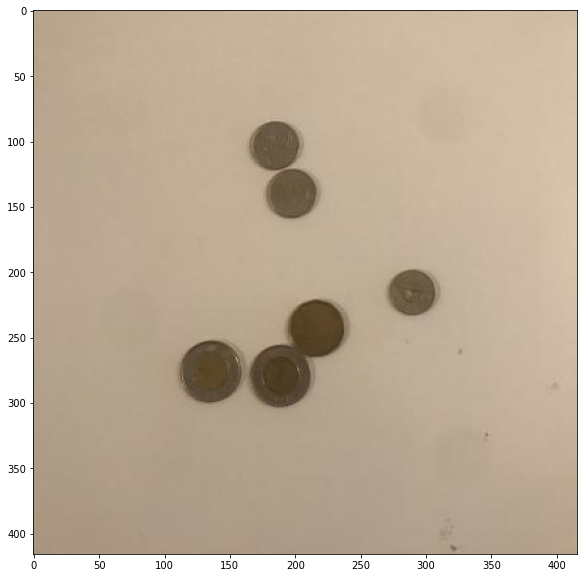

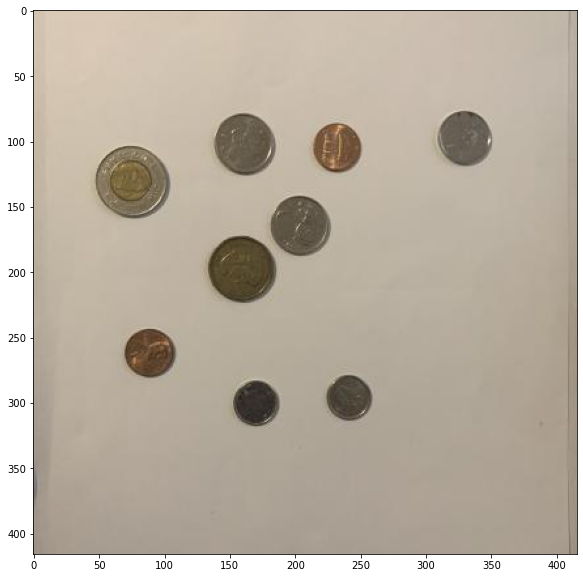

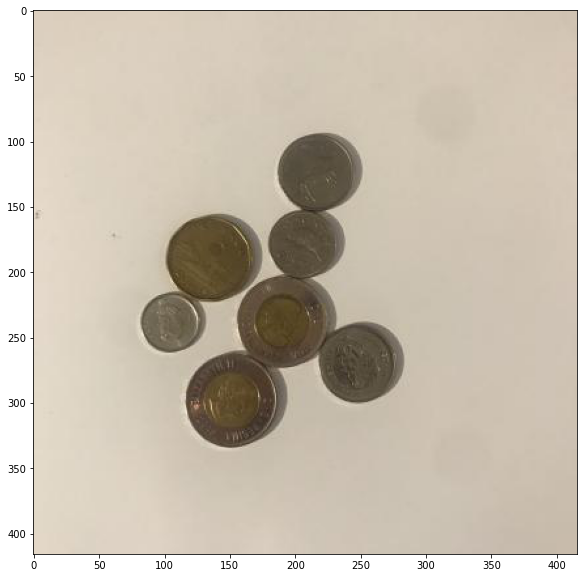

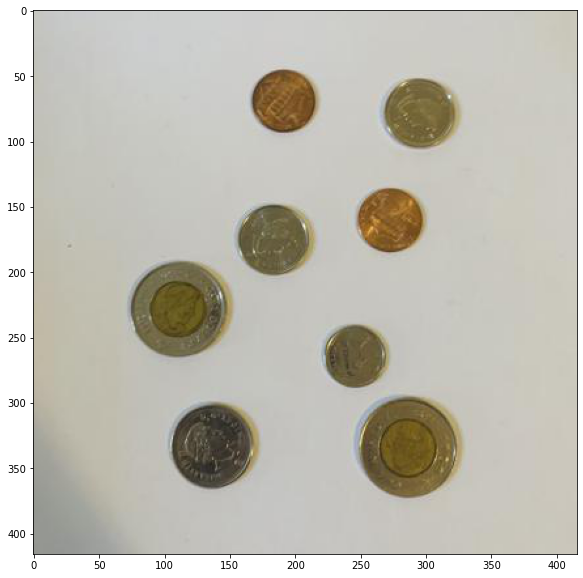

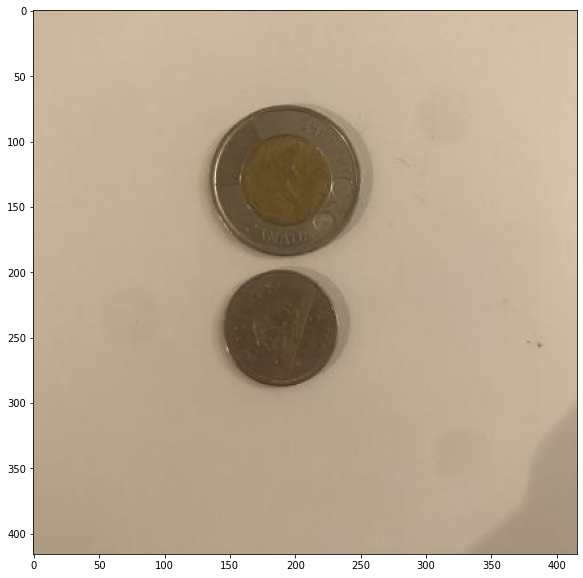

In [45]:
import matplotlib.pyplot as plt
import os
import numpy as np
import random

path_to_testing_data = '/content/drive/My Drive/Colab Notebooks/YOLO trainer/testingdata/train/'

# get random Images
test_images = [f for f in os.listdir(path_to_testing_data) if f.endswith('.jpg')]
test_images2 = [f for f in os.listdir(path_to_testing_data) if f.endswith('.jpg')]
test_images3 = [f for f in os.listdir(path_to_testing_data) if f.endswith('.jpg')]
test_images4 = [f for f in os.listdir(path_to_testing_data) if f.endswith('.jpg')]
test_images5 = [f for f in os.listdir(path_to_testing_data) if f.endswith('.jpg')]

# Get the full path to the random images
img_path = path_to_testing_data + random.choice(test_images);
img_path2 = path_to_testing_data + random.choice(test_images2);
img_path3 = path_to_testing_data + random.choice(test_images3);
img_path4 = path_to_testing_data + random.choice(test_images4);
img_path5 = path_to_testing_data + random.choice(test_images5);

# Show the random images
print(img_path)
figure = plt.figure(figsize=(20,10))
img1 = plt.imread(img_path)
plt.imshow(img1)

print(img_path2)
figure = plt.figure(figsize=(20,10))
img1 = plt.imread(img_path2)
plt.imshow(img1)

print(img_path3)
figure = plt.figure(figsize=(20,10))
img1 = plt.imread(img_path3)
plt.imshow(img1)

print(img_path4)
figure = plt.figure(figsize=(20,10))
img1 = plt.imread(img_path4)
plt.imshow(img1)

print(img_path5)
figure = plt.figure(figsize=(20,10))
img1 = plt.imread(img_path5)
plt.imshow(img1)

## Load the model for inference

CHANGE PATH `path_to_model` to the model you want to use to evaluate tests. You can use any image  we have in the drive, doesnt matter if they are labelled or not.

In [16]:
# path to the model
#path_to_model = "/content/drive/My Drive/Colab Notebooks/YOLO trainer/trained/model_final2.pt"
path_to_model_noHT =  "/content/drive/MyDrive/Colab Notebooks/YOLO trainer/trained/YOLO-final-without-headstails.pt"
path_to_model = "/content/drive/MyDrive/Colab Notebooks/YOLO trainer/trained/YOLO-21-final--WITH-HeadsTails.pt"

In [17]:
# Loading the model with Heads and tails
# torch.save(pretrained_dict.state_dict(), f"/content/drive/MyDrive/Colab Notebooks/YOLO trainer/try - Yolo-21.pt")
model_test = Yolov4(n_classes=12)
pretrained_dict = torch.load(path_to_model, map_location=torch.device('cpu'))
model_test.load_state_dict(pretrained_dict)
# Using cuda
model_test.cuda()

Yolov4(
  (down1): DownSample1(
    (conv1): Conv_Bn_Activation(
      (conv): ModuleList(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Mish()
      )
    )
    (conv2): Conv_Bn_Activation(
      (conv): ModuleList(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Mish()
      )
    )
    (conv3): Conv_Bn_Activation(
      (conv): ModuleList(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Mish()
      )
    )
    (conv4): Conv_Bn_Activation(
      (conv): ModuleList(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNo

In [18]:
# Loading model without heads and tails
model_test_noHT = Yolov4(n_classes=6)
pretrained_dict = torch.load(path_to_model_noHT, map_location=torch.device('cpu'))
model_test_noHT.load_state_dict(pretrained_dict)
# Using cuda
model_test_noHT.cuda()

Yolov4(
  (down1): DownSample1(
    (conv1): Conv_Bn_Activation(
      (conv): ModuleList(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Mish()
      )
    )
    (conv2): Conv_Bn_Activation(
      (conv): ModuleList(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Mish()
      )
    )
    (conv3): Conv_Bn_Activation(
      (conv): ModuleList(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Mish()
      )
    )
    (conv4): Conv_Bn_Activation(
      (conv): ModuleList(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNo

## Testing the model
- THE FONT AND CLASS TXT ARE IN THE GOOGLE DRIVE UNDER 4 - YOLO
- CHANGE THE PATH TO THE FONT under drawboxes2 (you have to download it or if you dont want tp use it just comment the two lines "font" and "font2" and in the draw.text functions (line74 and 80 remove where it says font=font and font=font2)

- Change the path `class_path` in the second cell to the path with the class 
txt files (so the txt has the mappings ($2.00 heads, $1.00 heads, etc) line by line)

In [21]:
import sys
import PIL
# utils.py is in the google drive under "4 - Yolo (3rd party code)"
from utils import *
from IPython.display import Image

num = 12
def loadnames(path):
    # Loads the classes 
    classes = []
    with open(path, 'r') as f:
      lines = f.readlines()
    for line in lines:
        classes.append(line)
    return classes 

colors = torch.FloatTensor([[1, 0, 1], [0, 0, 1], [0, 1, 1], [0, 1, 0], [1, 1, 0], [1, 0, 0]]);
def get_color(c, x, max_val):
    # Gets a random colour
    ratio = float(x) / max_val * 5
    i = int(math.floor(ratio))
    j = int(math.ceil(ratio))
    ratio = ratio - i
    r = (1 - ratio) * colors[i][c] + ratio * colors[j][c]
    return int(r * 255)

def get_value(class_list):
    # Converting the Classes to values
    two_h = class_list.count("$2.00 Heads")
    two_t = class_list.count("$2.00 Tails")
    one_h = class_list.count("$1.00 Heads")
    one_t = class_list.count("$1.00 Tails")
    quart_h = class_list.count("$0.25 Heads")
    quart_t = class_list.count("$0.25 Tails")
    dime_h  = class_list.count("$0.10 Heads")
    dime_t  = class_list.count("$0.10 Tails")
    nickel_h = class_list.count("$0.05 Heads")
    nickel_t = class_list.count("$0.05 Tails")
    penny_h = class_list.count("$0.01 Heads")
    penny_t = class_list.count("$0.01 Tails")
    return two_h*2.0 + two_t*2.0 + one_h*1 + one_t*1 + quart_h*0.25 + quart_t*0.25 + dime_h*0.10  + dime_t*0.10 + nickel_h*0.05 + nickel_t*0.05 + penny_h*0.01 + penny_t*0.01


def get_value1(class_list):
    # Converting the Classes to values for the model without heads and tails
    two = class_list.count("$2.00")
    one = class_list.count("$1.00")
    quart = class_list.count("$0.25")
    dime  = class_list.count("$0.10")
    nickel = class_list.count("$0.05")
    penny = class_list.count("$0.01")
    return two*2 + one*1 + quart*0.25 + dime*0.10 + nickel*0.05 + penny*0.01

def decode(box,w,h):
    # For acquiring the coordinates of the box
    x1 = w*(box[0]-box[2]/2.0)
    y1 = h*(box[1]-box[3]/2.0)
    x2 = w*(box[0]+box[2]/2.0)
    y2 = h*(box[1]+box[3]/2.0)
    return x1, y1, x2, y2


def drawboxes2(img, bb, savepath=None, class_list=None, color=None):
    # FOR DRAWING BOXES ON THE IMAGES
    w = img.width
    h = img.height
    total = []
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype("/content/drive/My Drive/Colab Notebooks/YOLO trainer/Kalam-Bold.ttf", 24)
    font2 = ImageFont.truetype("/content/drive/My Drive/Colab Notebooks/YOLO trainer/Kalam-Bold.ttf", 15)
    print("o-----------------------o")
    print("|         Coins         |")
    for i in range(len(bb)):
        # FOR EACH BOX draw
        box = bb[i]
        x1, y1, x2, y2 = decode(box,w,h)
        rgb = (255, 0, 0)

        if len(box) >= 7 and class_list != None:
            # Get the prediction and class id
            pred = box[5]
            id = box[6]
            print("o-----------------------o")
            print("|" + str(class_list[id]).replace('\n','') + "\t:\t" + str(f"{pred*100:0.1f}%\t|"))
            classes = len(class_list)        
            
            # Get the random RGB colours
            offset = id * 123457 % classes
            red = get_color(2, offset, classes)
            green = get_color(1, offset, classes)
            blue = get_color(0, offset, classes)
            rgb = (red, green, blue)

            # Draw the rectangle
            draw.rectangle([x1, y1, x2, y2], outline=rgb,width=2)
            draw.text(((x1+x2)//2, (y1+y2)//2), class_list[id], fill=(255,255,255),outline=(255,255,255), font = font2)
            draw.text((-2+(x1+x2)//2, -(y2//18)+(y1+y2)//2), str(f"{pred*100:.1f}%"), fill=(rgb))
        draw.rectangle([0,0,70,40], fill=(168,250,165))
        total += [class_list[id].replace("\n",'')]

    # Get the total sum
    print("o-----------------------o")
    value = get_value(total)
    print(f"|Total \t=       ${value:0.2f}\t|")
    print("o=======================o\n")
    draw.text((0, 0), str(f"${value:.2f}")[0:5], fill=(0,0,0), font = font)

    if savepath:
        img.save(savepath)    
    return img

o-----------------------o
|         Coins         |
o-----------------------o
|$2.00 Tails	:	99.7%	|
o-----------------------o
|$0.01 Heads	:	96.6%	|
o-----------------------o
|$0.01 Heads	:	97.2%	|
o-----------------------o
|$1.00 Tails	:	73.6%	|
o-----------------------o
|$0.10 Heads	:	45.4%	|
o-----------------------o
|$0.01 Heads	:	99.7%	|
o-----------------------o
|$0.01 Heads	:	81.0%	|
o-----------------------o
|$0.01 Heads	:	93.7%	|
o-----------------------o
|$0.10 Heads	:	79.6%	|
o-----------------------o
|$0.05 Tails	:	22.6%	|
o-----------------------o
|$0.01 Heads	:	65.1%	|
o-----------------------o
|$0.01 Heads	:	35.8%	|
o-----------------------o
|$0.01 Heads	:	76.4%	|
o-----------------------o
|$0.01 Heads	:	93.4%	|
o-----------------------o
|$0.01 Heads	:	98.5%	|
o-----------------------o
|$0.01 Tails	:	53.4%	|
o-----------------------o
|$0.25 Heads	:	86.3%	|
o-----------------------o
|$0.01 Heads	:	95.8%	|
o-----------------------o
|$0.01 Heads	:	98.4%	|
o----------------

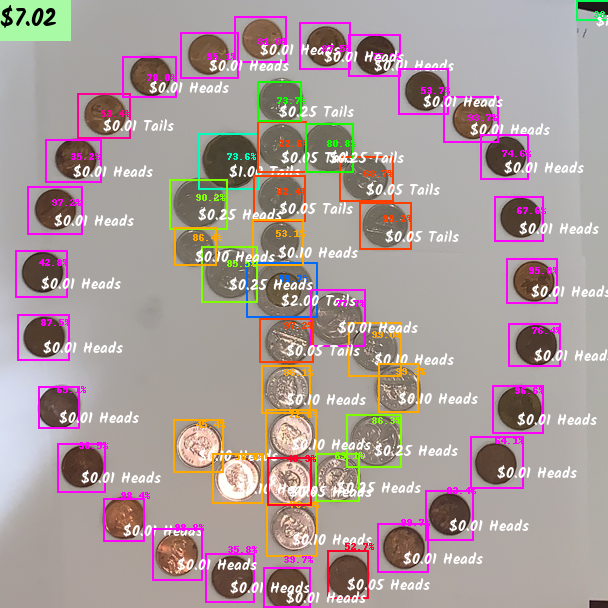

In [22]:
# PATH TO THE TXT FILE WITH THE MAPPINGS (IN THE GOOGLE DRIVE UNDER 4 - YOLO)

class_path = '/content/drive/MyDrive/Colab Notebooks/YOLO trainer/Coins4/train/classes.txt'
#class_path = "/content/drive/My Drive/Colab Notebooks/YOLO trainer/Coins/test/classes.txt"
class_names = loadnames(class_path)

img_path = "/content/drive/MyDrive/Colab Notebooks/YOLO trainer/IMG_6884.jpg"
# OPEN AND CONVERT IMAGE (img_path is from "Get Random Image" a few cells above this one)
img = PIL.Image.open(img_path).convert('RGB')

# Dont change size (all images resized to 608 to 608 by YOLO)
sized = img.resize((608, 608))

# GET BOX COORDINATES AND DRAW
use_cuda = 1
# IF YOU WANT THE OUTPUTS FROM THE PREDICTION SAVE "boxes" below to a txt file. Thanks
#boxes = do_detect(model_test, sized, 0.5, num, 0.4, use_cuda)
drawboxes2(sized, boxes, '/content/drive/My Drive/Colab Notebooks/YOLO trainer/sample3.jpg', class_names)

CHANGE THE PATH IN the function `drawboxes2` to where you want the tested images to be saved (THERE ARE FIVE OF THEM)

o-----------------------o
|         Coins         |
o-----------------------o
|$0.01 Tails	:	99.8%	|
o-----------------------o
|$2.00 Heads	:	66.5%	|
o-----------------------o
|$1.00 Heads	:	94.6%	|
o-----------------------o
|$0.25 Heads	:	99.1%	|
o-----------------------o
|$0.05 Heads	:	96.1%	|
o-----------------------o
|$0.05 Heads	:	99.1%	|
o-----------------------o
|$0.05 Tails	:	60.2%	|
o-----------------------o
|$0.10 Tails	:	99.3%	|
o-----------------------o
|$0.10 Heads	:	99.8%	|
o-----------------------o
|Total 	=       $3.61	|
o=======================o



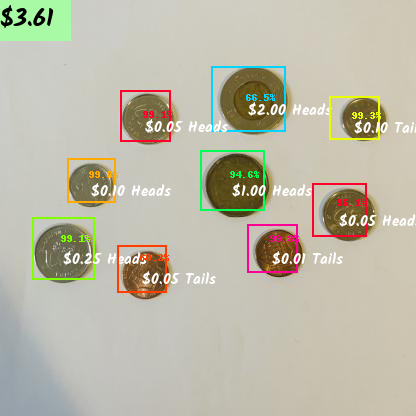

In [38]:
img = PIL.Image.open(img_path2).convert('RGB')
boxes = do_detect(model_test, img.resize((500, 500)), 0.5, num,0.4, use_cuda)
class_names = loadnames(class_path)
drawboxes2(img, boxes, '/content/drive/My Drive/Colab Notebooks/YOLO trainer/prediction2.jpg', class_names)


o-----------------------o
|         Coins         |
o-----------------------o
|$0.01 Tails	:	99.9%	|
o-----------------------o
|$0.05 Heads	:	99.2%	|
o-----------------------o
|$0.25 Heads	:	100.0%	|
o-----------------------o
|$0.01 Tails	:	50.3%	|
o-----------------------o
|$0.05 Heads	:	96.7%	|
o-----------------------o
|$0.10 Heads	:	99.9%	|
o-----------------------o
|$2.00 Heads	:	100.0%	|
o-----------------------o
|Total 	=       $2.47	|
o=======================o



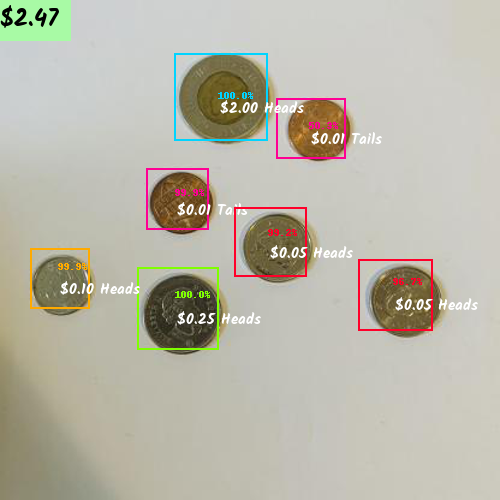

In [42]:
img = PIL.Image.open(img_path3).convert('RGB')
boxes = do_detect(model_test, img.resize((500, 500)), 0.5, num,0.4, use_cuda)
class_names = loadnames(class_path)
drawboxes2(img.resize((500, 500)), boxes, '/content/drive/My Drive/Colab Notebooks/YOLO trainer/prediction3.jpg', class_names)

o-----------------------o
|         Coins         |
o-----------------------o
|$0.10 Heads	:	98.5%	|
o-----------------------o
|$2.00 Heads	:	99.8%	|
o-----------------------o
|$2.00 Heads	:	99.9%	|
o-----------------------o
|$0.25 Heads	:	99.9%	|
o-----------------------o
|$0.25 Tails	:	99.5%	|
o-----------------------o
|$1.00 Heads	:	100.0%	|
o-----------------------o
|Total 	=       $5.60	|
o=======================o



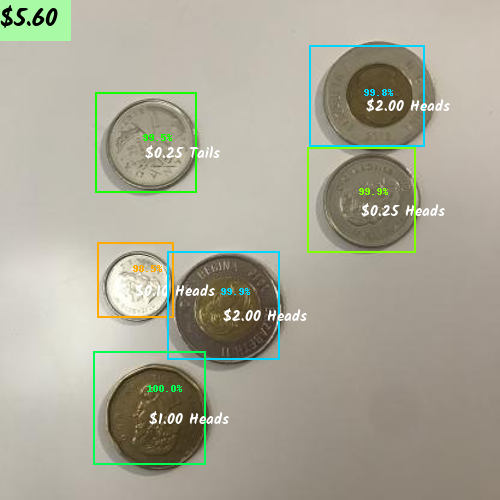

In [43]:
img = PIL.Image.open(img_path4).convert('RGB')
boxes = do_detect(model_test, img.resize((500, 500)), 0.5, num,0.4, use_cuda)
class_names = loadnames(class_path)
drawboxes2(img.resize((500, 500)), boxes, '/content/drive/My Drive/Colab Notebooks/YOLO trainer/prediction4.jpg', class_names)


o-----------------------o
|         Coins         |
o-----------------------o
|$0.25 Tails	:	100.0%	|
o-----------------------o
|$0.01 Tails	:	99.9%	|
o-----------------------o
|$2.00 Tails	:	100.0%	|
o-----------------------o
|$0.05 Heads	:	51.4%	|
o-----------------------o
|$0.10 Heads	:	99.9%	|
o-----------------------o
|Total 	=       $2.41	|
o=======================o



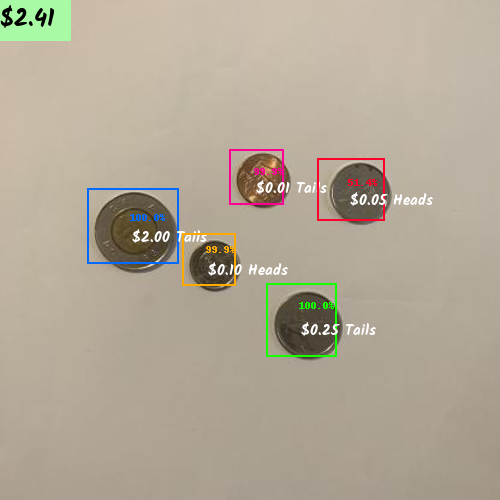

In [44]:
img = PIL.Image.open(img_path5).convert('RGB')
boxes = do_detect(model_test, img.resize((500, 500)), 0.5, num,0.4, use_cuda)
class_names = loadnames(class_path)
drawboxes2(img.resize((500, 500)), boxes, '/content/drive/My Drive/Colab Notebooks/YOLO trainer/prediction5.jpg', class_names)

## Confusion Matrix (David)

- Colour map
- array [[label, prediction], [label, prediction], ...]

In [ ]:
"""
# Confusion Matrix
Creates a confusion matrix and displays it in three formats.
- Assumptions:
    - There is at least 1 of each coin type
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import confusion_matrix


def confusion(labels, prediction, ran, plot: bool = False, plot3d: bool = False, text: bool = False, HT:bool = True):
    """
    Create the confusion matrix for an array.
    :param array: ndarray, 3D - [[[label, prediction], [label, prediction], ...]]
    :return: ndarray, 2D - confusion matrix
    """
    # Create confusion matrix
    r = confusion_matrix(labels, prediction, labels = list(range(ran)))
    # Get names and numbers
    if HT:
        label_yolo = {
            '$0.01 H': 0,
            '$0.01 T': 1,
            '$0.05 H': 2,
            '$0.05 T': 3,
            '$0.10 H': 4,
            '$0.10 T': 5,
            '$0.25 H': 6,
            '$0.25 T': 7,
            '$1.00 H': 8,
            '$1.00 T': 9,
            '$2.00 H': 10,
            '$2.00 T': 11
        }
    else:
        label_yolo = {
            '$0.01': 0,
            '$0.05': 1,
            '$0.10': 2,
            '$0.25': 3,
            '$1.00': 4,
            '$2.00': 5,
        }
    names = tuple(label_yolo.keys())
    numbers = tuple(label_yolo.values())

    if plot:
        print("\n")
        # Plot confusion matrix
        fig = plt.figure('Confusion Matrix')
        plt.title('Confusion Matrix')
        # X-Y labels
        plt.xlabel('Prediction')
        plt.ylabel('Ground Truth')

        # Change axis labels
        plt.xticks(numbers, names)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(numbers, names)
        # Show
        i = plt.imshow(r, cmap='binary')
        plt.colorbar(i)

    if plot3d:
        print("\n")
        # Plot confusion shape - https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html
        fig = plt.figure()
        ax = fig.gca(projection='3d')

        # Set X-Y-Z labels
        ax.set_xlabel('Prediction')
        ax.set_ylabel('Ground Truth')
        ax.set_zlabel('Confusion')

        # Plot
        X, Y = np.meshgrid(numbers, numbers)
        surf = ax.plot_surface(X, Y, r, cmap=cm.coolwarm, linewidth=0, antialiased=False)

        ax.set_zlim(0, 1.01)
        fig.colorbar(surf, shrink=0.5, aspect=5)
        plt.show()

    if text:
        print("\n")
        # Print title
        string = '\t'.join(names) + '\n'
        string =  '     \t' + string

        # Print data
        for i, name in enumerate(names):
            # Print Header
            string += name + '\t'
            # Print data row
            row = list(map(str, r[i]))
            string += '\t'.join(row) + '\n'

        print(string)

    return r


In [ ]:
# Convert
convert_HT( path = "/content/drive/MyDrive/Colab Notebooks/YOLO trainer/val and test path/test.txt", path_1 = "/content/drive/MyDrive/Colab Notebooks/YOLO trainer/val and test path/test_noHT.txt")

There are 69 images to test.
[                                        ][▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅]]
(402, 2)
[[ 7.  7.]
 [ 7.  7.]
 [11. 11.]
 [11. 11.]
 [ 8.  8.]
 [10. 10.]
 [ 5.  5.]
 [ 4.  4.]
 [ 4.  4.]
 [ 9.  9.]
 [ 9.  9.]
 [ 5.  5.]
 [ 6.  6.]
 [10. 10.]
 [11. 11.]
 [ 5.  5.]
 [ 6.  6.]
 [ 7.  7.]
 [11. 11.]
 [ 5.  5.]
 [ 6.  6.]
 [ 6.  6.]
 [ 7.  7.]
 [11. 11.]
 [ 5.  5.]
 [ 2.  6.]
 [ 6.  6.]
 [ 7.  7.]
 [ 8.  8.]
 [10. 10.]
 [11. 11.]
 [ 6.  6.]
 [ 7.  7.]
 [ 8.  8.]
 [11. 11.]
 [ 5.  5.]
 [ 3.  3.]
 [ 6.  6.]
 [ 6.  6.]
 [ 9.  9.]
 [11. 11.]
 [11. 11.]
 [ 5.  5.]
 [ 6.  6.]
 [ 6.  6.]
 [ 9.  9.]
 [ 7.  7.]
 [10. 10.]
 [ 3.  3.]
 [ 9.  9.]
 [ 2.  4.]
 [10. 10.]
 [ 6.  6.]
 [10. 10.]
 [ 6.  6.]
 [ 3.  3.]
 [10. 10.]
 [ 7.  7.]
 [ 9.  9.]
 [ 4.  4.]
 [ 3.  3.]
 [10. 10.]
 [ 7.  7.]
 [ 9.  9.]
 [ 4.  2.]
 [ 6.  6.]
 [10. 10.]
 [ 4.  4.]
 [ 2.  2.]
 [ 6.  6.]
 [ 6.  6.]
 [ 8.  8.]
 [10. 10.]
 [1

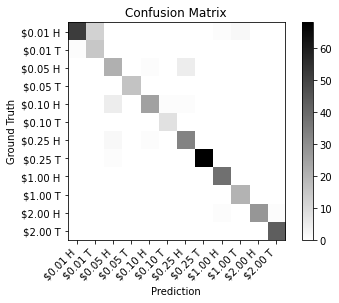

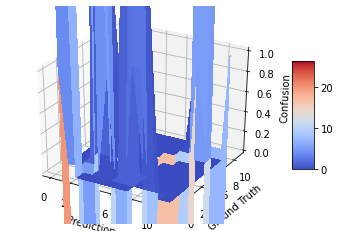



     	$0.01 H	$0.01 T	$0.05 H	$0.05 T	$0.10 H	$0.10 T	$0.25 H	$0.25 T	$1.00 H	$1.00 T	$2.00 H	$2.00 T
$0.01 H	52	12	0	0	0	0	0	0	1	2	0	0
$0.01 T	1	15	0	0	0	0	0	0	0	0	0	0
$0.05 H	0	0	21	0	1	0	5	0	0	0	0	0
$0.05 T	0	0	0	16	0	0	0	0	0	0	0	0
$0.10 H	0	0	5	0	25	1	1	0	0	0	0	0
$0.10 T	0	0	0	0	0	8	0	0	0	0	0	0
$0.25 H	0	0	2	0	1	0	33	0	0	0	0	0
$0.25 T	0	0	1	0	0	0	0	68	0	0	0	0
$1.00 H	0	0	0	0	0	0	0	0	38	0	0	0
$1.00 T	0	0	0	0	0	0	0	0	0	20	0	0
$2.00 H	0	0	0	0	0	0	0	0	1	0	28	1
$2.00 T	0	0	0	0	0	0	0	0	0	0	0	43




Accuracy of  0.01 : 83 % (67/80)
Accuracy of  0.05 : 82 % (37/45)
Accuracy of  0.10 : 91 % (33/36)
Accuracy of  0.25 : 94 % (101/107)
Accuracy of  1.00 : 93 % (58/62)
Accuracy of  2.00 : 98 % (71/72)


In [ ]:
# With Heads and Tails
num =12
Cfg.classes = num
arr = get_testaccuracy(model_test, "/content/drive/MyDrive/Colab Notebooks/YOLO trainer/val and test path/test.txt", Cfg )
print(np.shape(arr))
labels, prediction = arr[:, 0], arr[:, 1]
print(arr)
confusion(labels, prediction, num, plot = True, plot3d = True, text = True, HT = True )
print("\n\n")
get_EachAcc(num, labels, prediction, HT=True)

There are 69 images to test.
[                                        ][▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅]]
(401, 2)






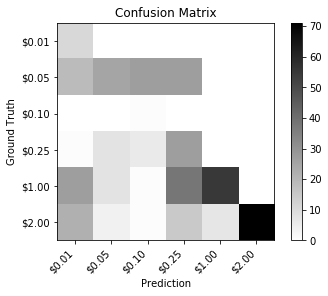

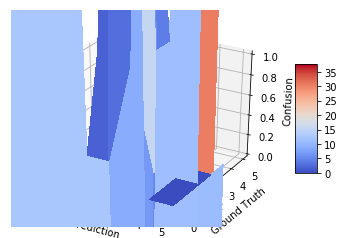



     	$0.01	$0.05	$0.10	$0.25	$1.00	$2.00
$0.01	11	0	0	0	0	0
$0.05	19	25	27	27	0	0
$0.10	0	0	1	0	0	0
$0.25	1	8	6	27	0	0
$1.00	27	8	1	38	55	0
$2.00	22	4	1	15	7	71




Accuracy of  0.01 : 13 % (11/80) 
Accuracy of  0.05 : 55 % (25/45) 
Accuracy of  0.10 :  2 % ( 1/36) 
Accuracy of  0.25 : 25 % (27/107) 
Accuracy of  1.00 : 88 % (55/62) 
Accuracy of  2.00 : 98 % (71/72) 


In [ ]:
# Without Heads and Tails
num = 6
Cfg.classes = num
arr = get_testaccuracy(model_test_noHT, "/content/drive/MyDrive/Colab Notebooks/YOLO trainer/val and test path/test_noHT.txt", Cfg )
print(np.shape(arr))
labels, prediction = arr[:, 0], arr[:, 1]

confusion(labels, prediction, num, plot = True, plot3d = True, text = True, HT = False)
print("\n\n")
get_EachAcc(num, labels, prediction, HT=False)